### Python Script to Compute Mann Kendall trends written by Herbert. O. Misiani (misianihabat@icpac.net) and Samuel Ekwacu (ekwacu@gmail.com)

In [2]:
#other necessary libraries.
#from shapely.geometry.polygon import Polygon
#import geopandas as gpd
#import shapefile as shp
#import regionmask
#import netCDF4 as nc
#from descartes import PolygonPatch

In [3]:
#dh = dh.sel(time=slice("1960-01-16 00:00:00", "2019-12-16 00:00:00"))

In [1]:
#conda uninstall cartopy shapely

In [2]:
#conda install cartopy shapely

In [1]:
#conda install -c conda-forge cartopy

In [8]:
import pymannkendall as mk
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mplPath
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mpl
from matplotlib.colors import ListedColormap

ImportError: cannot import name lgeos

In [5]:
dh = xr.open_dataset('D:/Folder_2023/Research/Joan/urban_hist1.nc')
#dh               
dh.data_vars

Data variables:
    urban    (time, latitude, longitude) float32 ...

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


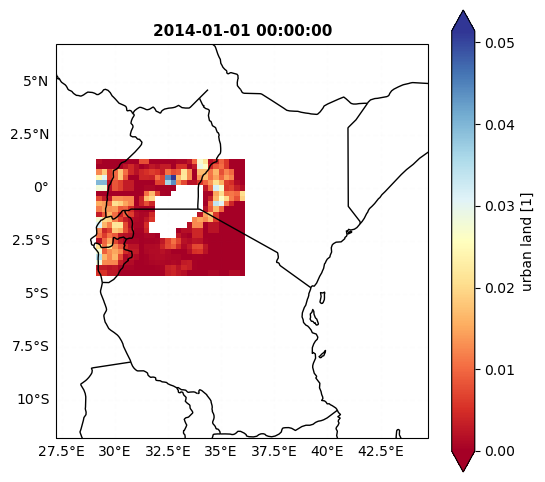

In [6]:
fig = plt.figure(figsize=[6,6])
# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([27.25, 44.75, -11.75, 6.75], crs=ccrs.PlateCarree())
dh['urban'].sel(time='2014-01-01 00:00:00').plot(ax=ax, cmap=plt.cm.RdYlBu,
                        extend='both',transform=ccrs.PlateCarree())
#levels=np.arange(0, 150, 20),
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
plt.title('2014-01-01 00:00:00',fontsize=11, fontweight='bold')
#plt.savefig('C:/ERSSTv5/output/V wind component diff.png')
plt.show()

In [7]:
###For Annual Trends Only
dat_samp =dh['urban'].groupby('time.year').mean('time')    ## Group data into yearly means for annual trends
#Data

In [8]:
#dat_samp = Data.sel(longitude=slice(27.25, 44.75), latitude=slice(-11.75, 6.75))  ## Slice to EAC
slope_val = np.zeros((len(dat_samp.latitude.values),len(dat_samp.longitude.values)))
p_value = np.zeros((len(dat_samp.latitude.values),len(dat_samp.longitude.values)))
#output = []
for i in np.arange(len(dat_samp.latitude.values)):
    for j in np.arange(len(dat_samp.longitude.values)):
        
        try:
            slope_val[i,j] = mk.original_test(dat_samp[:,i,j]).slope  ## trend,h,p,z,tau,s,var_s,slope,intercept = mk.original_test(x,0.05)
            p_value[i,j] = mk.original_test(dat_samp[:,i,j]).p
        except:
            slope_val[i,j] = np.nan
            p_value[i,j] = np.nan
            
        #output.append(slope_val)

In [9]:
## Define data as Xarray dataset and save as netcdf
output1=xr.DataArray(slope_val, dims=('latitude', 'longitude'), coords={'latitude':dat_samp.latitude, 'longitude':dat_samp.longitude}, attrs=dict(description="slope", units="sst year-1"),)
data1 = output1.rename("trend")

output2=xr.DataArray(p_value, dims=('latitude', 'longitude'), coords={'latitude':dat_samp.latitude, 'longitude':dat_samp.longitude}, attrs=dict(description="significance",),)
data2 = output2.rename("p_val")
#data2
## Save Data as netcdf
#data1.to_netcdf('C:/Diabatic_data/Af_CNHR_1991-2021_Annual_trend.nc', mode='w')
#data2.to_netcdf('C:/Diabatic_data/Af_CNHR_1991-2021_Annual_pvalue.nc', mode='w')
#data2.plot()

In [6]:
## clip the data with the mask
trnd = data1
pval = data2
#pval

NameError: name 'data1' is not defined

NameError: name 'mpl' is not defined

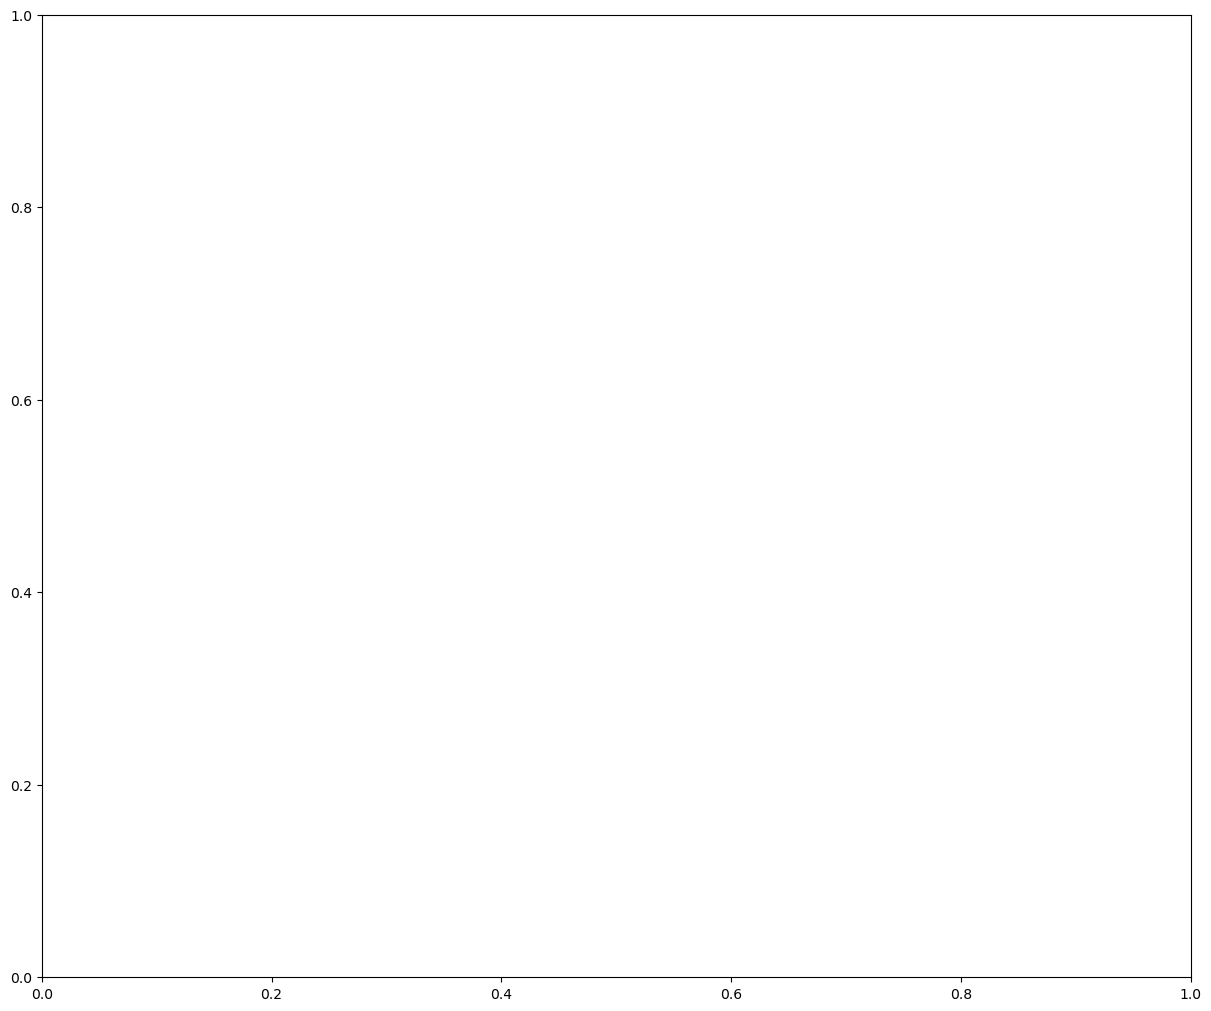

In [7]:
#Plot the map
none_map = ListedColormap(['none'])
fig = plt.subplots(constrained_layout=True, figsize=(12, 10))
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 0.4
plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=0))

gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER

## Change this to the threshold you need.
cond = (pval <= 0.05)
## Mask out the areas that do not satisfy the conditions
sig_reg = pval.where(cond)

cs = plt.contourf(dat_samp.longitude, dat_samp.latitude, trnd.values[:,:],  
               levels=np.arange(-0.4, 2.1, 0.4),cmap=plt.cm.RdYlBu, extend='both') 
#levels=np.arange(-0.4, 2.1, 0.4)
## make a hatch of significance
hatch = ax.pcolor(dat_samp.longitude, dat_samp.latitude, sig_reg.data[:,:], cmap=none_map, 
                 hatch='...', edgecolor='black', lw=0, zorder=4)

# Adding geographical features
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.add_feature(cfeature.BORDERS, color='black', linewidth=1)
## title attributes
plt.title('OND season Rainfall Trends (1990-2020)',fontsize=16, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=14, fontweight='bold')
plt.xlabel('Longitude',fontsize=14, fontweight='bold')
##ploting the legend
plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)

###plt.colorbar(cax=cax)
plt.colorbar(cs, ax=ax,cax = plt.axes([0.77, 0.1, 0.018, 0.6]), label='seasonal trends (mm/year)')
# save output
#plt.savefig('F:/Folder_2023/Ingeri/CRU-OND-season-wet_EAC.jpeg', dpi=300)
plt.show()

### Incase you prefer to use a shape file, refer to the next cell 

In [1]:
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import matplotlib.path as mplPath
## for plotting a polygon
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
#import regionmask

In [2]:
#conda install -c conda-forge regionmask

In [3]:
#conda install -c conda-forge geopandas

In [4]:
## read the Shapeifle of the Area of interest for use in masking over the required region
######For East Africa
#sf = gpd.read_file('F://Folder_2022//Research//EA_Shp//East_Africa-Disolved.shp')  ## Used in Masking
#sf2 = shp.Reader('F://Folder_2022//Research//EA_Shp//EA.shp')       ## Used in plotting
sf2 = shp.Reader('D://Folder_2023//Research//Joan//lv_basin.shp')       ## Used in plotting
## Mask the trends and p_values
#trend_mask = regionmask.mask_3D_geopandas(sf, data1.lon, data1.lat, lon_name='lon', lat_name='lat')
#pval_mask = regionmask.mask_3D_geopandas(sf, data2.lon, data2.lat, lon_name='lon', lat_name='lat')

#trnd = data1.where(trend_mask)         ## clip the data with the mask
#pval = data2.where(pval_mask)

NameError: name 'pval' is not defined

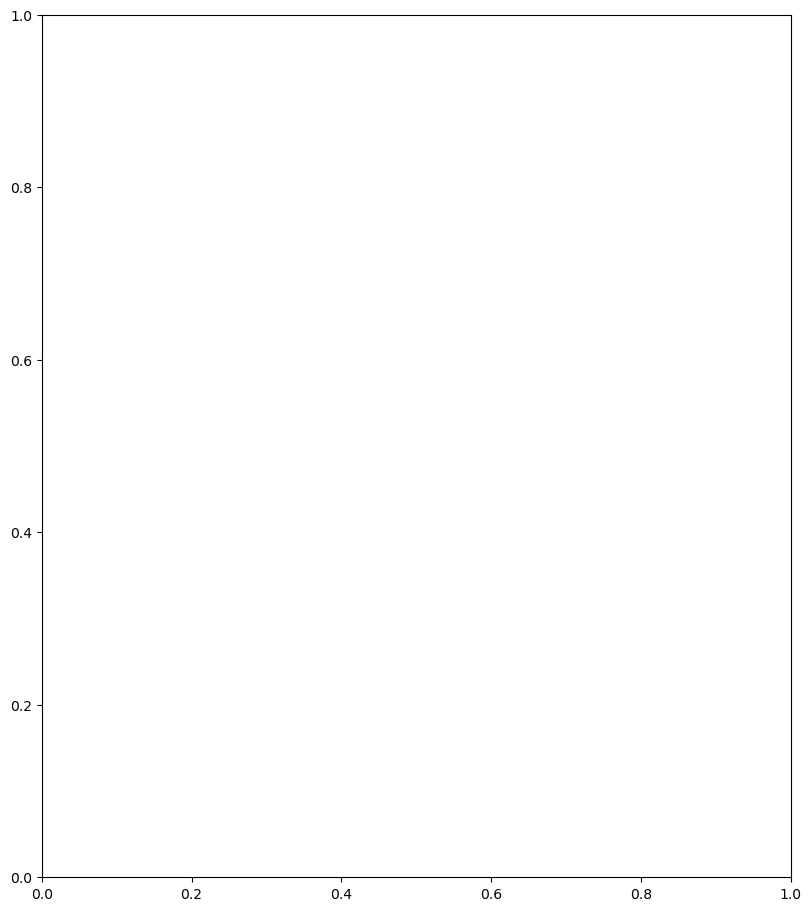

In [5]:

from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 9))

## Change this to the threshold you need.
cond = (pval <= 0.05)

## Mask out the areas that do not satisfy the conditions
sig_reg = pval.where(cond)

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
    
cs = plt.contourf(dat_samp.longitude, dat_samp.latitude, trnd.values[:,:],  
                levels=np.arange(-0.4, 2.1, 0.4),cmap=plt.cm.RdYlBu, extend='both') 
#levels=np.arange(-40, 0, 8)
## make a hatch of significance
hatch = ax.pcolor(dat_samp.longitude, dat_samp.latitude, sig_reg.data[:,:], cmap=none_map, 
                 hatch='...', edgecolor='black', lw=0, zorder=4)
## title attributes
plt.title('OND season Rainfall Trends (1990-2020)',fontsize=16, fontweight='bold')
plt.xticks(size = 15, fontweight='bold')
plt.yticks(size = 15, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=12, fontweight='bold')
plt.xlabel('Longitude',fontsize=12, fontweight='bold')
##ploting the legend
plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
###plt.colorbar(cax=cax)
fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Precipitation trends (mm/season)')
# save output
#plt.savefig('F:/Folder_2023/Ingeri/CRU-OND_season1_EAC-wet.jpeg', dpi=300)
plt.show()

### God is Great















